### Logistic Regression with breast cancer Winconsin dataset

In [1]:
import pandas as pd

#### Data preprocessing

In [2]:
df=pd.read_csv(r'C:\Users\vedant\Downloads\data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df = df.dropna(axis=1, how='all')

In [8]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
df['diagnostics'] = df['diagnosis'].map({'M': 1, 'B': 0})
df = df.drop(columns=['diagnosis'])

In [10]:
X = df.drop(columns='diagnostics')
y = df['diagnostics']

#### Logistic Regression Model training

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
model = LogisticRegression(max_iter=10000)
# Train the model
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

#### Error metrics

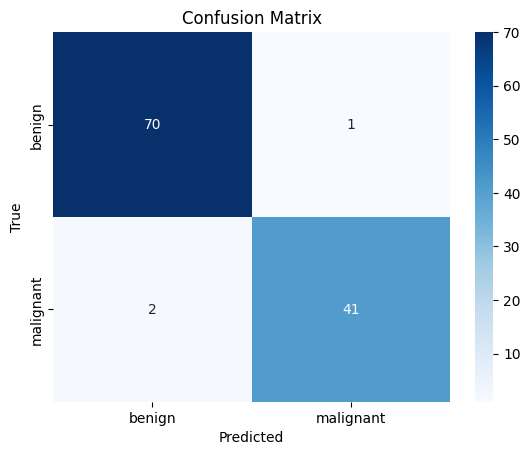

Classification Report:
              precision    recall  f1-score   support

      benign       0.97      0.99      0.98        71
   malignant       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Precision: 0.98
Recall: 0.95
ROC-AUC: 1.00


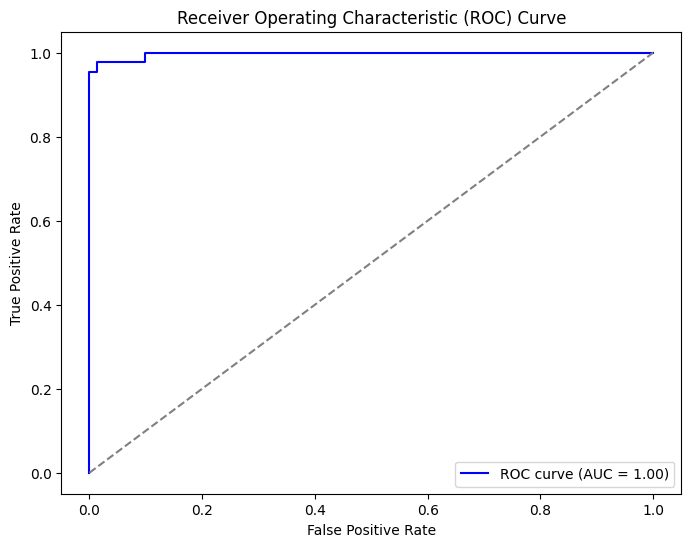

In [20]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
class_labels = ['benign', 'malignant']
# Make predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for the positive class

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels= class_labels, yticklabels= class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names= class_labels))

# Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc:.2f}")

# ROC Curve Plot
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### label distributions

In [22]:
# Assuming your target variable is 'y_train' and 'y_test' (from splitting the data)
print("Training set class distribution:")
print(y_train.value_counts())

print("\nTest set class distribution:")
print(y_test.value_counts())

Training set class distribution:
diagnostics
0    286
1    169
Name: count, dtype: int64

Test set class distribution:
diagnostics
0    71
1    43
Name: count, dtype: int64


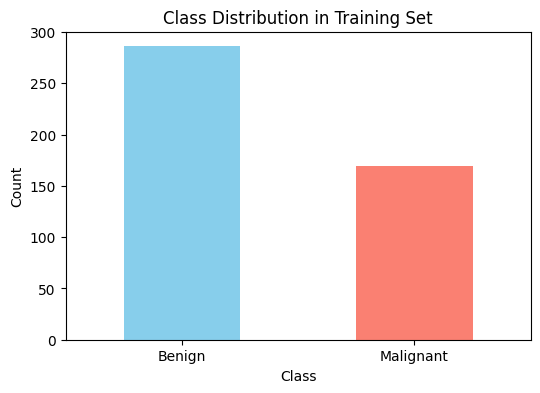

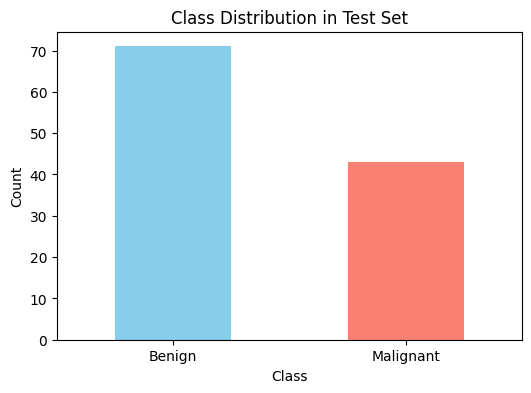

In [23]:
plt.figure(figsize=(6, 4))
y_train.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'], rotation=0)
plt.show()

# Plot class distribution in the test set
plt.figure(figsize=(6, 4))
y_test.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution in Test Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'], rotation=0)
plt.show()

#### Balancing weight for imbalanced distribution.

In [25]:
from sklearn.linear_model import LogisticRegression
# Initialize Logistic Regression model with class weights balanced
model1 = LogisticRegression(max_iter=10000, class_weight='balanced')
model1.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

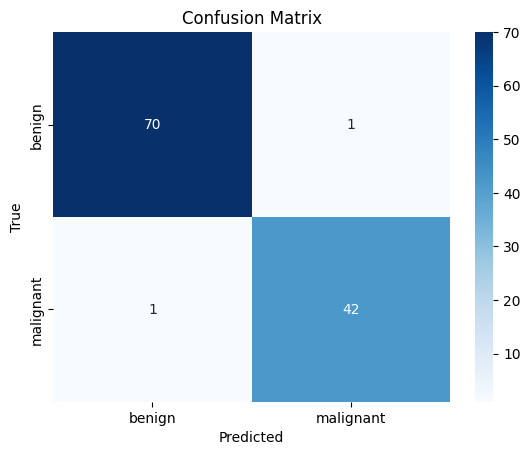

Classification Report:
              precision    recall  f1-score   support

      benign       0.99      0.99      0.99        71
   malignant       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Precision: 0.98
Recall: 0.98
ROC-AUC: 1.00


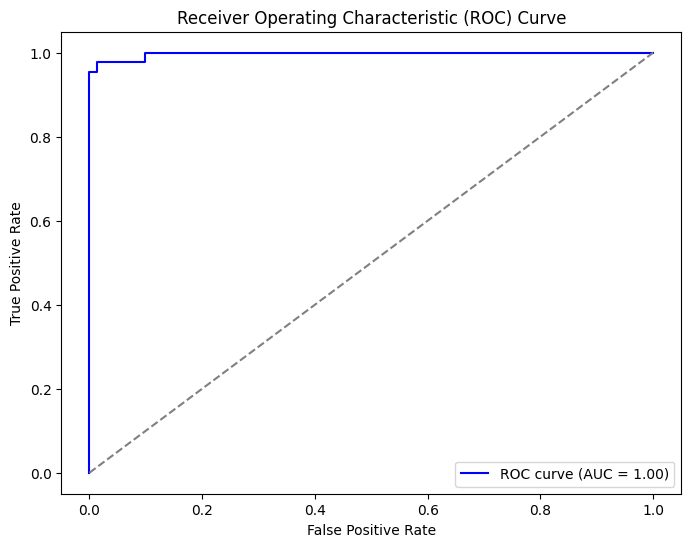

In [26]:
class_labels = ['benign', 'malignant']
# Make predictions
y_pred1 = model1.predict(X_test_scaled)
y_prob1 = model1.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for the positive class

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels= class_labels, yticklabels= class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test, y_pred1, target_names= class_labels))
# Precision and Recall
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob1)
print(f"ROC-AUC: {roc_auc:.2f}")

# ROC Curve Plot
fpr, tpr, thresholds = roc_curve(y_test, y_prob1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### L2 Regularization (Ridge)

Confusion Matrix (L2 Regularization):


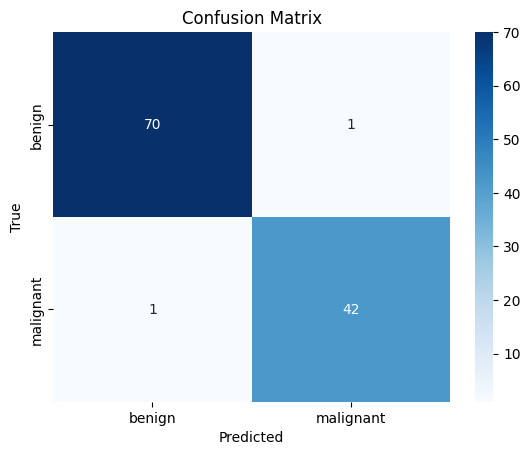

Precision: 0.98
Recall: 0.98
F1-Score: 0.98
ROC-AUC: 1.00


In [29]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
model_l2 = LogisticRegression(max_iter=10000, class_weight='balanced', penalty='l2', C=1.0)

# Train the model
model_l2.fit(X_train_scaled, y_train)

# Evaluate with the same metrics
y_pred_l2 = model_l2.predict(X_test_scaled)
y_prob_l2 = model_l2.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_l2)
print("Confusion Matrix (L2 Regularization):")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels= class_labels, yticklabels= class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred_l2)
recall = recall_score(y_test, y_pred_l2)
f1 = f1_score(y_test, y_pred_l2)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob_l2)
print(f"ROC-AUC: {roc_auc:.2f}")

#### L1 Lasso Regularization

Confusion Matrix (L1 Regularization):


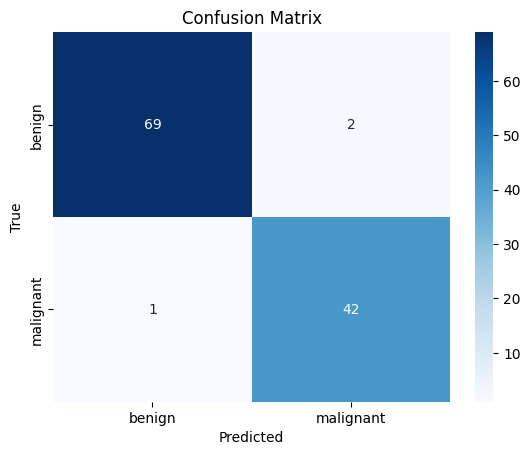

Precision: 0.95
Recall: 0.98
F1-Score: 0.97
ROC-AUC: 1.00


In [30]:
model_l1 = LogisticRegression(max_iter=10000, class_weight='balanced', penalty='l1', solver='liblinear', C=1.0)

# Train the model
model_l1.fit(X_train_scaled, y_train)

# Evaluate with the same metrics
y_pred_l1 = model_l1.predict(X_test_scaled)
y_prob_l1 = model_l1.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_l1)
print("Confusion Matrix (L1 Regularization):")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels= class_labels, yticklabels= class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred_l1)
recall = recall_score(y_test, y_pred_l1)
f1 = f1_score(y_test, y_pred_l1)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob_l1)
print(f"ROC-AUC: {roc_auc:.2f}")

#### Hyperparameter tuning for C 

Best value of C: {'C': 0.1}
Confusion Matrix (Best Model):


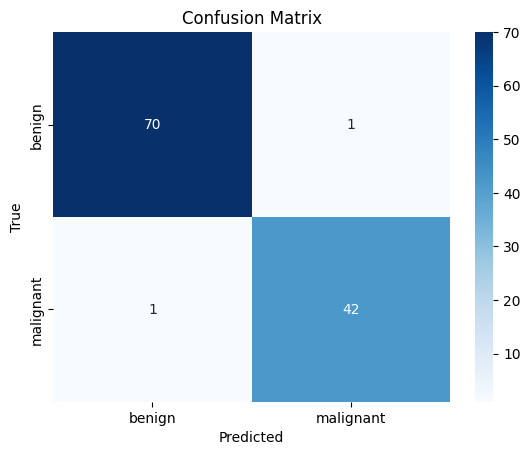

Precision: 0.98
Recall: 0.98
F1-Score: 0.98
ROC-AUC: 1.00


In [31]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search over
param_grid = {'C': [0.1, 1.0, 10, 100]}

# Initialize the Logistic Regression model with L2 regularization
model_h = LogisticRegression(max_iter=10000, class_weight='balanced', penalty='l2')

# Grid search with cross-validation
grid_search = GridSearchCV(model_h, param_grid, cv=5, scoring='roc_auc')  # You can also use 'accuracy', 'f1', etc.
grid_search.fit(X_train_scaled, y_train)

# Best parameter
print("Best value of C:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_h = best_model.predict(X_test_scaled)
y_prob_h = best_model.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_h)
print("Confusion Matrix (Best Model):")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels= class_labels, yticklabels= class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred_h)
recall = recall_score(y_test, y_pred_h)
f1 = f1_score(y_test, y_pred_h)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob_h)
print(f"ROC-AUC: {roc_auc:.2f}")

#### Coefficients

In [33]:
print("L2 Coefficients:", model_l2.coef_)
print("L1 Coefficients:", model_l1.coef_)

L2 Coefficients: [[ 0.20031569  0.38745965  0.36750592  0.35066144  0.4295619   0.01978227
  -0.62683974  0.77651426  1.16415303 -0.25939976 -0.01893282  1.3414592
  -0.13400636  0.61803504  0.91753327  0.19798288 -0.69838257 -0.22696526
   0.35429982 -0.47669847 -0.64528438  0.87435348  1.35185551  0.56016983
   0.83690571  0.52125267 -0.01431333  0.95513025  0.82254873  1.19078339
   0.21102654]]
L1 Coefficients: [[ 0.09665973  0.          0.          0.          0.          0.
  -0.22244143  0.          2.40035764 -0.1276098   0.          2.58718864
  -0.28969963  0.          0.          0.35686828 -0.8147076   0.
   0.         -0.48147444 -0.32194194  2.98564624  1.83209068  0.
   0.16703408  0.13930466  0.          1.29426196  0.27871287  1.08774204
   0.        ]]


In [38]:
print("Number of zero coefficients in L1:", sum(model_l1.coef_ == 0))

Number of zero coefficients in L1: [0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1]


#### Threshold tuning

Best Threshold based on F1-Score: 0.47


C:\Users\vedant\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


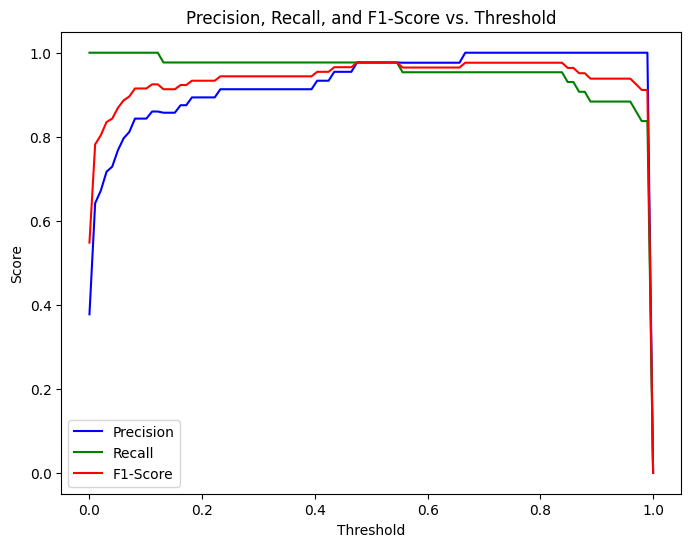

In [39]:
y_prob12 = model1.predict_proba(X_test_scaled)[:, 1]

# Define different thresholds to evaluate
thresholds = np.linspace(0, 1, 100)

# Initialize lists to store evaluation metrics for each threshold
precision_scores = []
recall_scores = []
f1_scores = []
for threshold in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    y_pred_threshold = (y_prob12 >= threshold).astype(int)
    
    # Calculate precision, recall, and F1 score for the current threshold
    precision_scores.append(precision_score(y_test, y_pred_threshold))
    recall_scores.append(recall_score(y_test, y_pred_threshold))
    f1_scores.append(f1_score(y_test, y_pred_threshold))

# Find the threshold with the best F1 score (for example)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Best Threshold based on F1-Score: {best_threshold:.2f}")
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision_scores, label='Precision', color='blue')
plt.plot(thresholds, recall_scores, label='Recall', color='green')
plt.plot(thresholds, f1_scores, label='F1-Score', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score vs. Threshold')
plt.legend()
plt.show()